# **1. Front Matter:**
#### Let's start by importing the libraries that will help us preprocess data, filter it and perform the analysis.

In [1]:
# Front matter
import joblib
import warnings
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from reusable import data_cleaning
from reusable import date_cnvrsn
from reusable import feature_engineering
from reusable import dropper
from reusable import histogram_plot
from reusable import bar_plot
from reusable import lower_bound
from reusable import bd_outlier
from reusable import categorical_conversion
from reusable import transformation
from reusable import stratkfold
from reusable import model
from preprocessing import preprocess



In [2]:
# Supresses the warnings for cleaner output
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

# **2. Preprocessing The Datasets:**

In [6]:
# Reads the datasets
#df1 = pd.read_csv('data/raw/members_v3.csv')  # Columns: msno, city, bd, gender, ...
#df2 = pd.read_csv('data/raw/transactions_v2.csv')  # Columns: msno, payment_method_id, ...
#df3 = pd.read_csv('data/raw/train_v2.csv')  # Columns: msno, is_churn
#df4 = pd.read_csv('data/raw/user_logs_v2.csv') #Columns: msno, date, num_25 ...

In [7]:
# Removes the internal duplicates in df3
#train_data = df3.drop_duplicates().reset_index(drop = True)

# Merges all the datasets
#merged_df = df1.merge(df2, on = 'msno', how = 'inner')
#merged_df_1 = train_data.merge(df4, on = 'msno', how = 'inner')
#data_df = merged_df.merge(merged_df_1, on = 'msno', how = 'inner')

In [3]:
# Saves the final dataset
#data_df.to_csv('data/procssed/data.csv', index=False)
data_df = pd.read_csv('data/processed/data.csv') #Columns: msno, date, num_25 ...
print("Datasets have been successfully merged and saved.")

Datasets have been successfully merged and saved.


# **3. Understanding the "data_df" dataset:**

In [4]:
# Overview of the dataset
print("\033[1m" + "Overview of the Dataset:\n" + "\033[0m")
print("\033[1m" + f'Number of rows:' + "\033[0m", data_df.shape[0])
print("\033[1m" + f'Number of variables:' + "\033[0m", data_df.shape[1])
print("\033[1m" + "\nVariables:" + "\033[0m", data_df.columns.tolist())
print("\033[1m" + "\nData types:" + "\033[0m")
print(data_df.dtypes)

Overview of the Dataset:

Number of rows: 16305887
Number of variables: 23

Variables: ['msno', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'transaction_date', 'membership_expire_date', 'is_cancel', 'is_churn', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']

Data types:
msno                       object
city                        int64
bd                          int64
gender                     object
registered_via              int64
registration_init_time      int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
is_churn                    int64
date                        int64
num_25                 

In [6]:
# Number of unique values in each feature
print("\033[1m" + "Unique values:" + "\033[0m")
print(data_df.nunique())

Unique values:
msno                       725722
city                           21
bd                            217
gender                          2
registered_via                  5
registration_init_time       4748
payment_method_id              33
payment_plan_days              30
plan_list_price                42
actual_amount_paid             42
is_auto_renew                   2
transaction_date              804
membership_expire_date       1640
is_cancel                       2
is_churn                        2
date                           31
num_25                        681
num_50                        309
num_75                        172
num_985                       286
num_100                      1042
num_unq                       717
total_secs                8523619
dtype: int64


In [5]:
# Number of missing values in each feature
print("\033[1m" + "Number of missing values:" + "\033[0m", data_df.isnull().sum().values.sum())
print("\033[1m" + "\nMissing values:" + "\033[0m")
print(data_df.isnull().sum())

Number of missing values: 7543180

Missing values:
msno                            0
city                            0
bd                              0
gender                    7543180
registered_via                  0
registration_init_time          0
payment_method_id               0
payment_plan_days               0
plan_list_price                 0
actual_amount_paid              0
is_auto_renew                   0
transaction_date                0
membership_expire_date          0
is_cancel                       0
is_churn                        0
date                            0
num_25                          0
num_50                          0
num_75                          0
num_985                         0
num_100                         0
num_unq                         0
total_secs                      0
dtype: int64


# **4. Data Cleaning:**

In [4]:
data_cleaning(data_df)
# Rechecking for missing values
print("Missing values in categorical columns after imputation:")
print(data_df.isnull().sum())

Missing values in categorical columns after imputation:
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
is_churn                  0
date                      0
num_25                    0
num_50                    0
num_75                    0
num_985                   0
num_100                   0
num_unq                   0
total_secs                0
dtype: int64


# **5. Feature Engineering:**

In [5]:
date_cnvrsn(data_df)
feature_engineering(data_df)
dropper(data_df)

,city,bd,gender,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,...,total_activity,completion_rate,is_discounted,regis_to_trans,membership_duration,interaction_ratio,transaction_year,transaction_month,registration_year,registration_month
0,1,0,1,7,41,30,129,129,1,0,...,23,0.695652,0,2021,32,0.869565,2017,3,2011,9
1,1,0,1,7,41,30,129,129,1,0,...,45,0.822222,0,2021,32,0.266667,2017,3,2011,9
2,1,0,1,7,41,30,129,129,1,0,...,135,0.792593,0,2021,32,0.200000,2017,3,2011,9
3,1,0,1,7,41,30,129,129,1,0,...,155,0.819355,0,2021,32,0.354839,2017,3,2011,9
4,1,0,1,7,41,30,129,129,1,0,...,54,0.703704,0,2021,32,0.648148,2017,3,2011,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305882,1,0,1,7,41,30,99,99,1,0,...,3,0.666667,0,517,31,1.000000,2017,3,2015,10
16305883,1,0,1,7,41,30,99,99,1,0,...,3,0.000000,0,517,31,1.000000,2017,3,2015,10
16305884,1,0,1,7,41,30,99,99,1,0,...,8,0.625000,0,517,31,1.000000,2017,3,2015,10
16305885,1,0,1,7,41,30,99,99,1,0,...,6,0.666667,0,517,31,1.000000,2017,3,2015,10


In [61]:
# Automatic Grouping of 'regis_to_trans' and 'membership_duration' of users into quartiles
#data_df['registration_days_group'] = pd.qcut(data_df['regis_to_trans'], q=4, labels=False)
#data_df['membership_duration_group'] = pd.qcut(data_df['membership_duration'], q=4, labels=False)


In [8]:
data_df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'payment_method_id',
       'payment_plan_days', 'plan_list_price', 'actual_amount_paid',
       'is_auto_renew', 'is_cancel', 'is_churn', 'num_25', 'num_50', 'num_75',
       'num_985', 'num_100', 'num_unq', 'total_secs', 'total_activity',
       'completion_rate', 'is_discounted', 'regis_to_trans',
       'membership_duration', 'interaction_ratio', 'transaction_year',
       'transaction_month'],
      dtype='object')

In [9]:
data_df.head()

,city,bd,gender,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,...,num_unq,total_secs,total_activity,completion_rate,is_discounted,regis_to_trans,membership_duration,interaction_ratio,transaction_year,transaction_month
0,1,0,1,7,41,30,129,129,1,0,...,20,4105.797,23,0.695652,0,2021,32,0.869565,2017,3
1,1,0,1,7,41,30,129,129,1,0,...,12,12165.187,45,0.822222,0,2021,32,0.266667,2017,3
2,1,0,1,7,41,30,129,129,1,0,...,27,30361.560,135,0.792593,0,2021,32,0.200000,2017,3
3,1,0,1,7,41,30,129,129,1,0,...,55,35368.322,155,0.819355,0,2021,32,0.354839,2017,3
4,1,0,1,7,41,30,129,129,1,0,...,35,9913.278,54,0.703704,0,2021,32,0.648148,2017,3


In [10]:
data_df.dtypes

city                     int64
bd                       int64
gender                   int64
registered_via           int64
payment_method_id        int64
payment_plan_days        int64
plan_list_price          int64
actual_amount_paid       int64
is_auto_renew            int64
is_cancel                int64
is_churn                 int64
num_25                   int64
num_50                   int64
num_75                   int64
num_985                  int64
num_100                  int64
num_unq                  int64
total_secs             float64
total_activity           int64
completion_rate        float64
is_discounted            int64
regis_to_trans           int64
membership_duration      int64
interaction_ratio      float64
transaction_year         int32
transaction_month        int32
dtype: object

In [16]:
#data_df.to_csv('data/data123.csv', index=False)
#data_df = pd.read_csv('data/data123.csv')

# **6. Exploratory Data Analysis:**

> ## Numerical Variables

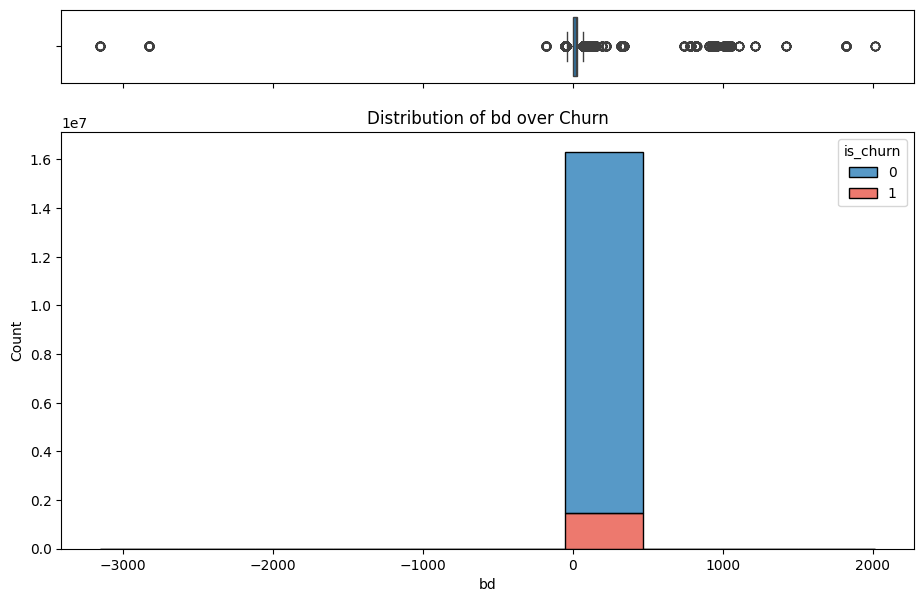

In [18]:
histogram_plot(data_df, 'bd')

In [19]:
count = data_df[~data_df['bd'].between(0, 100, inclusive="left")].shape[0]
print(f"Number of users with membership duration excluding 0 and 100: {count}")

Number of users with membership duration excluding 0 and 100: 10673


In [20]:
count = data_df[data_df['bd'].between(0, 100, inclusive="left")].shape[0]
print(f"Number of users with membership duration between 0 and 100: {count}")

Number of users with membership duration between 0 and 100: 16295214


In [21]:
total_rows = data_df.shape[0]
print(f"Total number of rows in the dataset: {total_rows}")

Total number of rows in the dataset: 16305887


In [6]:
data_df = lower_bound(data_df)

In [7]:
data_df = bd_outlier(data_df)
data_df.shape[0]

8375005

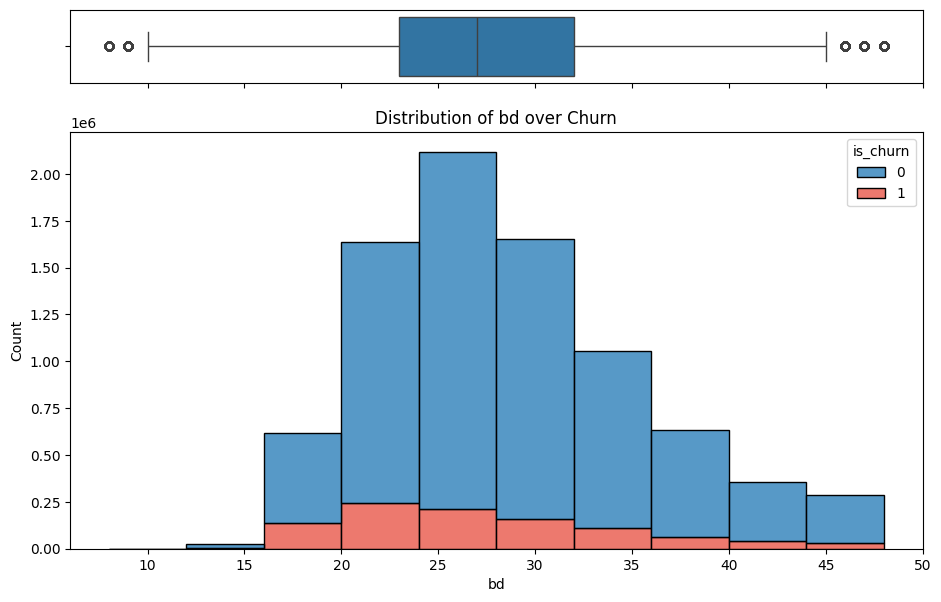

In [26]:
histogram_plot(data_df, 'bd')

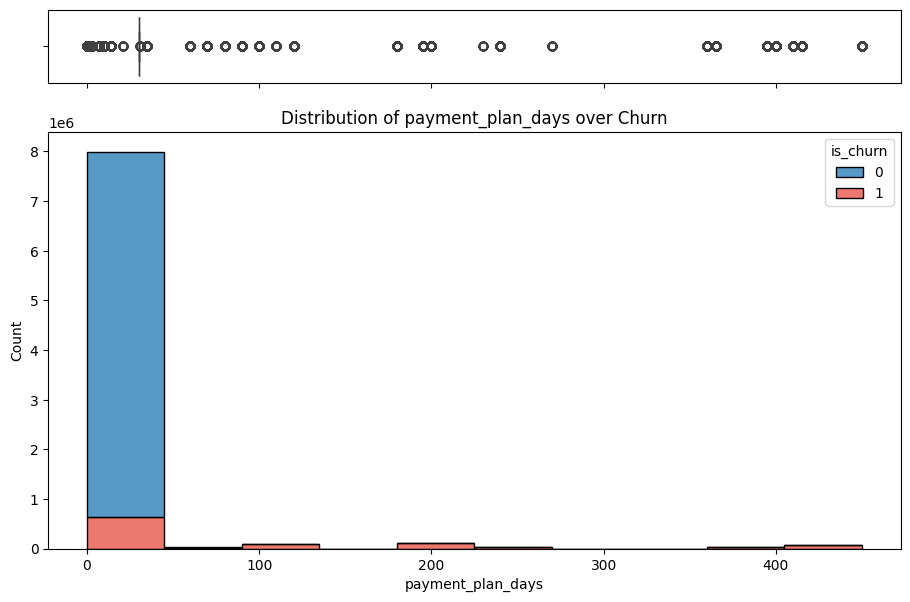

In [27]:
histogram_plot(data_df, 'payment_plan_days')

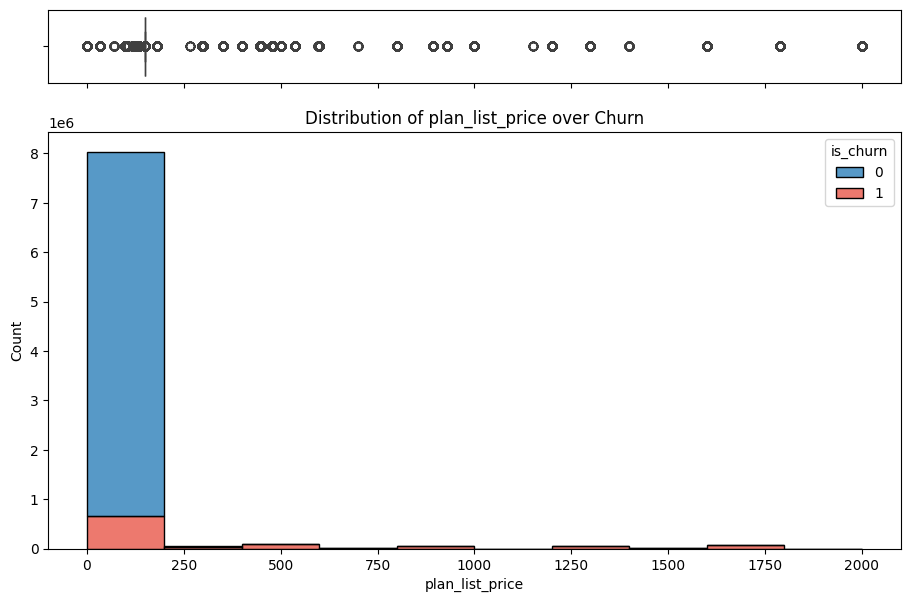

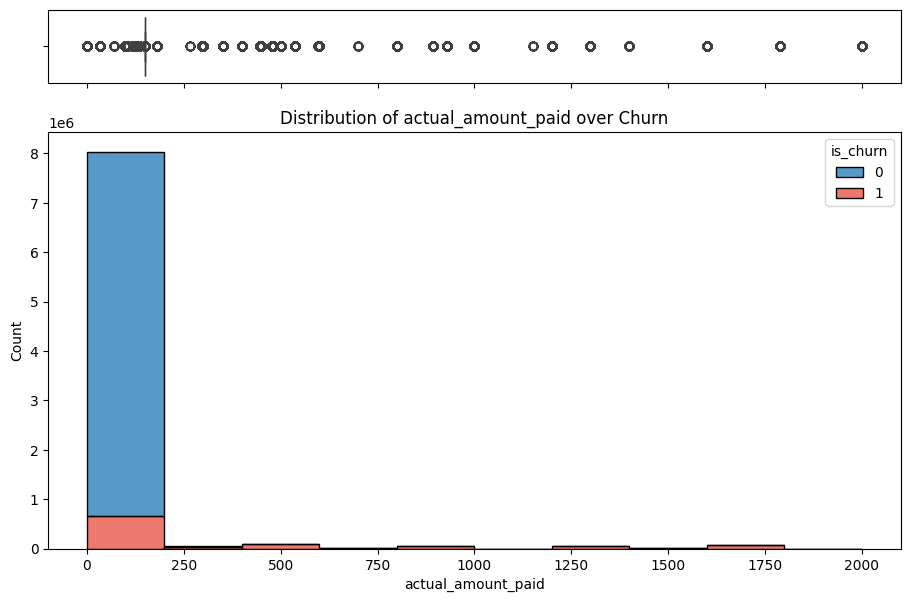

In [28]:
histogram_plot(data_df, 'plan_list_price')
histogram_plot(data_df, 'actual_amount_paid')

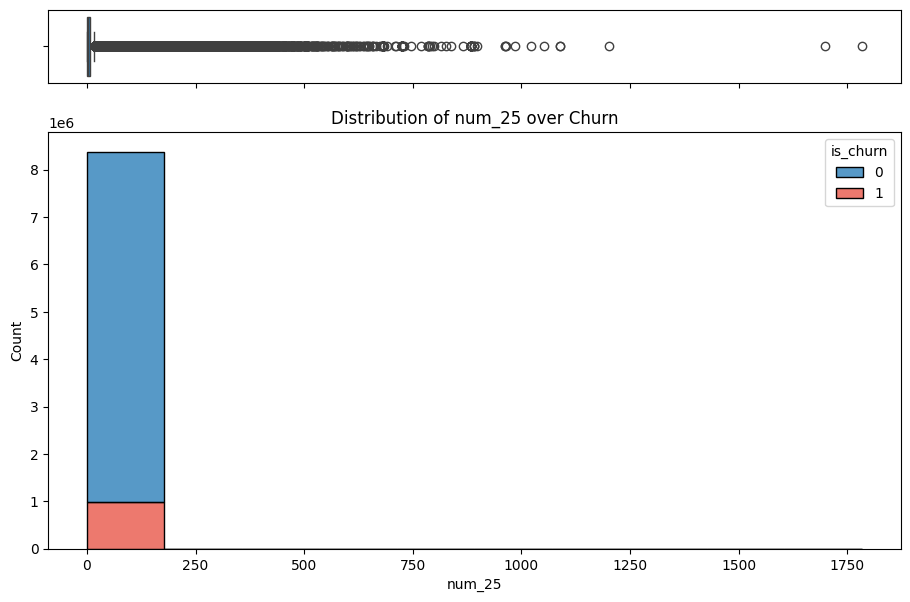

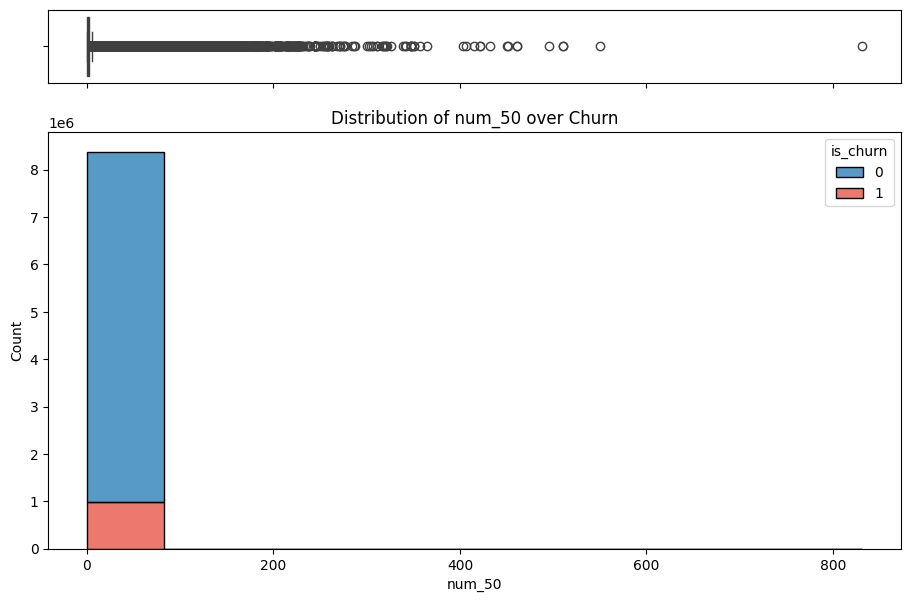

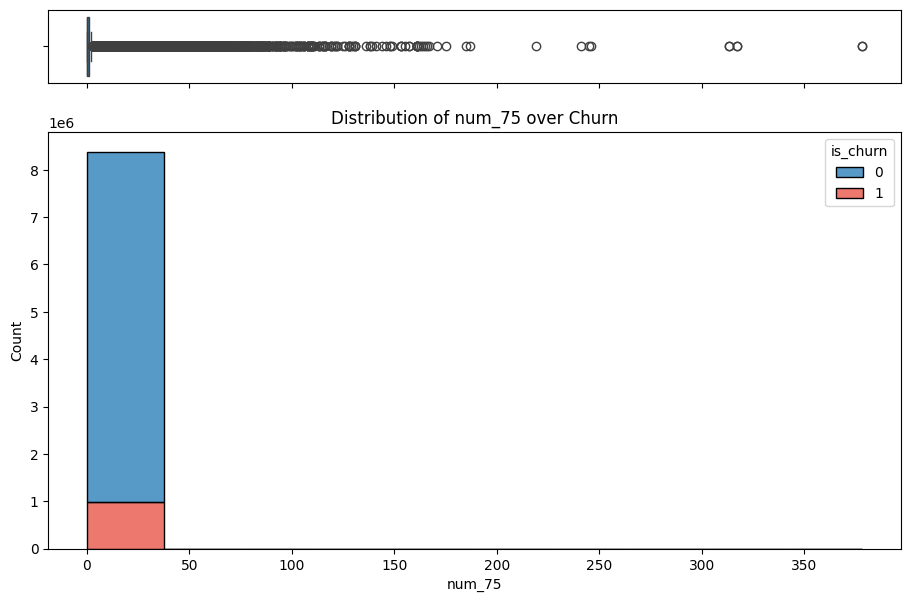

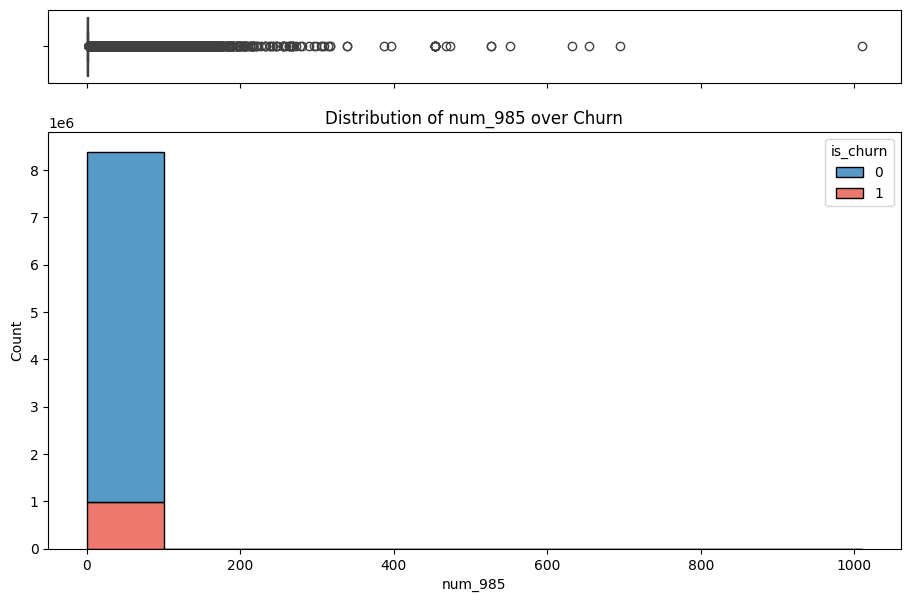

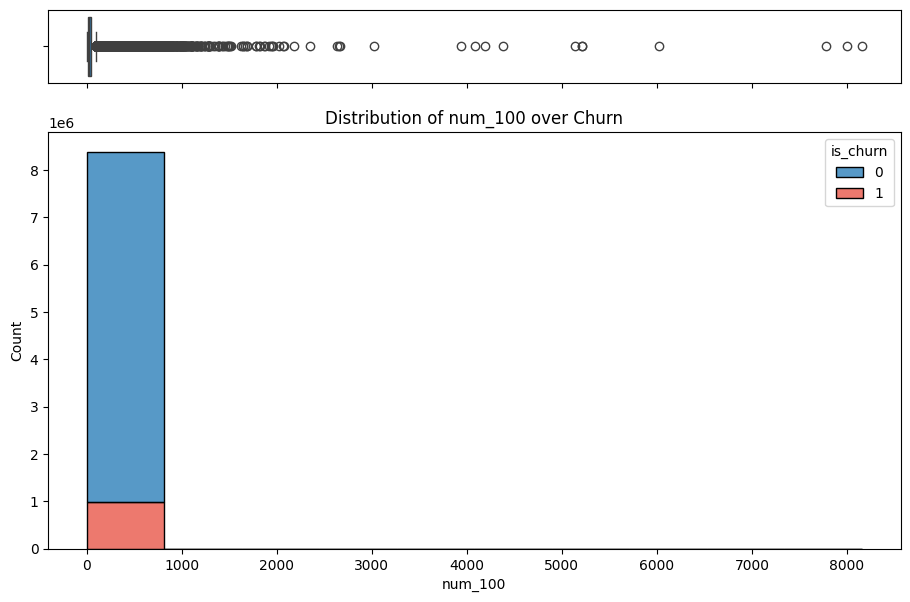

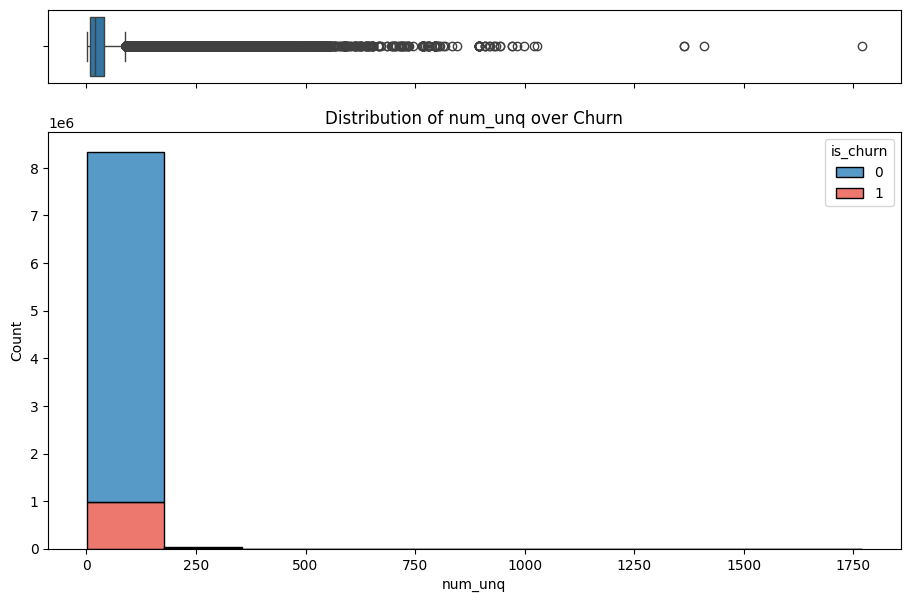

In [29]:
histogram_plot(data_df, 'num_25')
histogram_plot(data_df, 'num_50')
histogram_plot(data_df, 'num_75')
histogram_plot(data_df, 'num_985')
histogram_plot(data_df, 'num_100')
histogram_plot(data_df, 'num_unq')

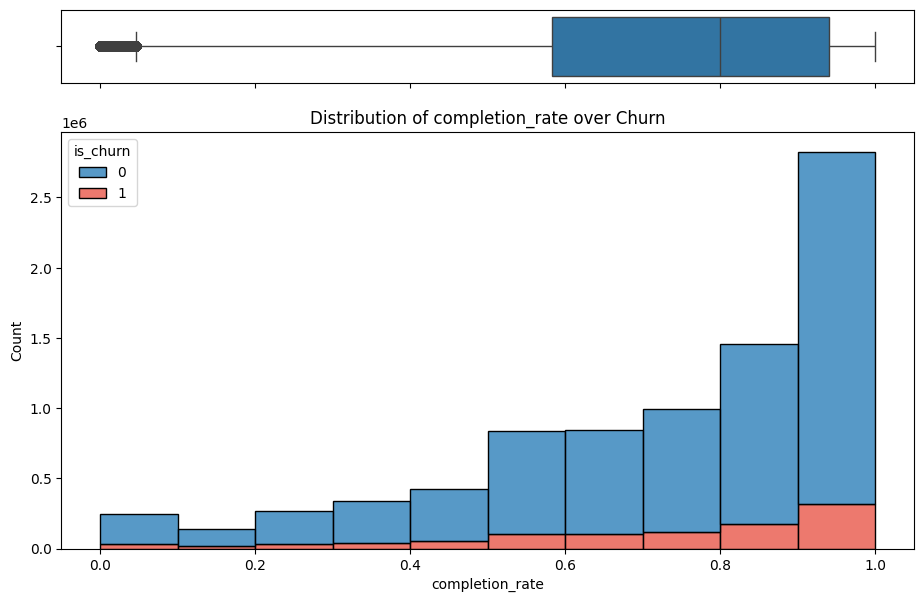

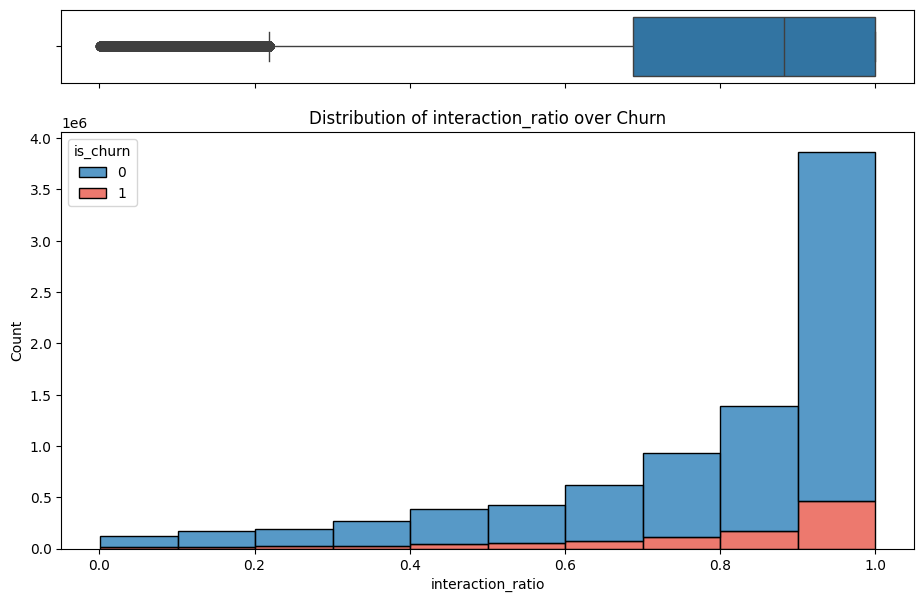

In [30]:
histogram_plot('completion_rate')
histogram_plot('interaction_ratio')

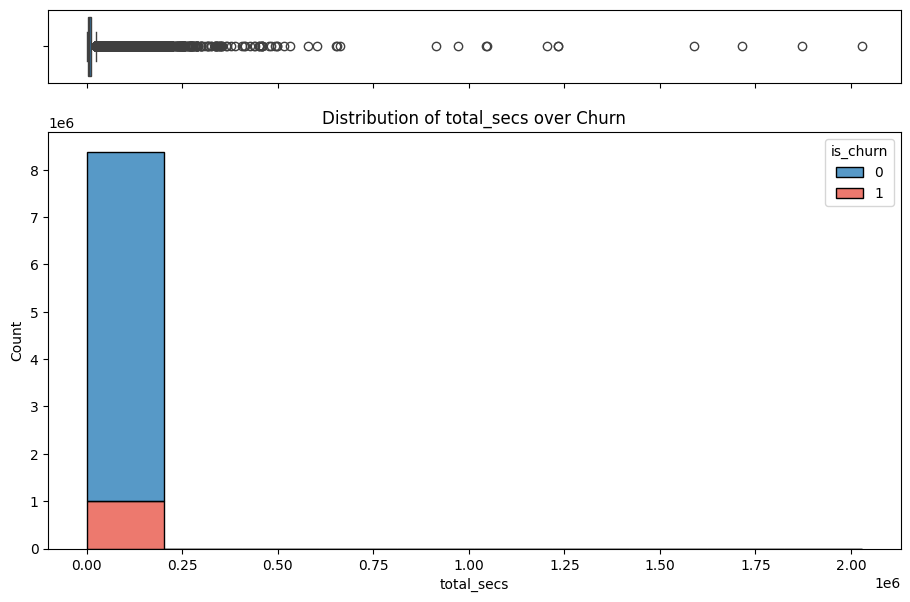

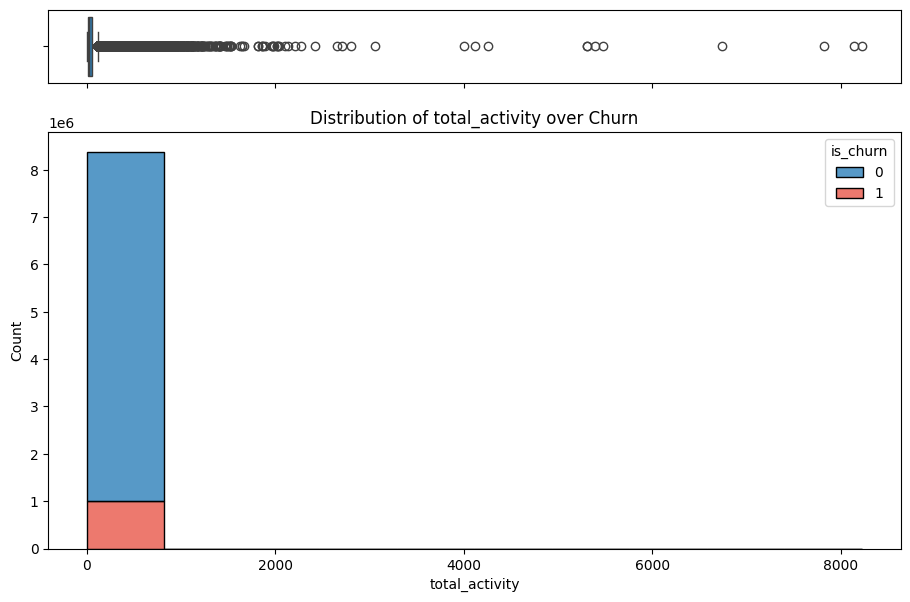

In [31]:
histogram_plot(data_df, 'total_secs')
histogram_plot(data_df, 'total_activity')

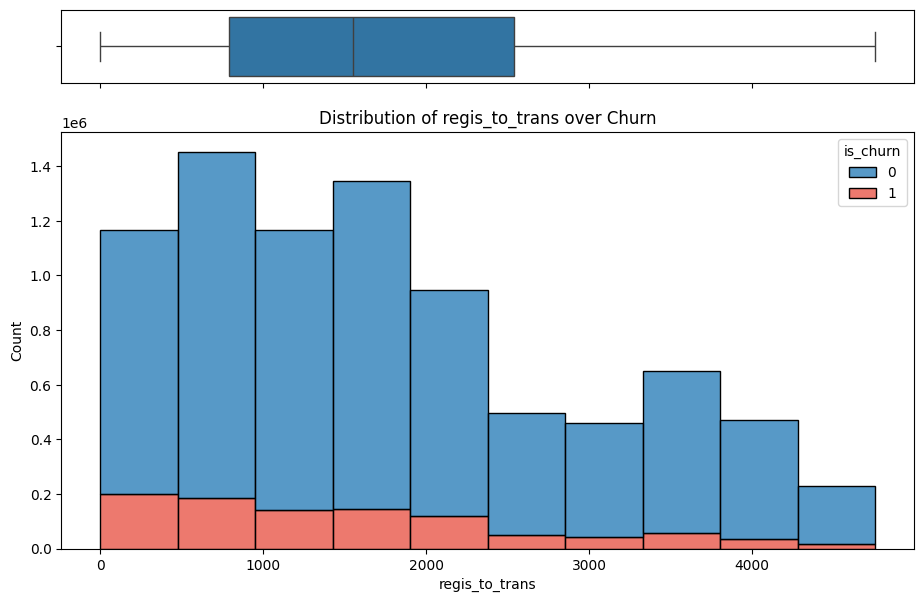

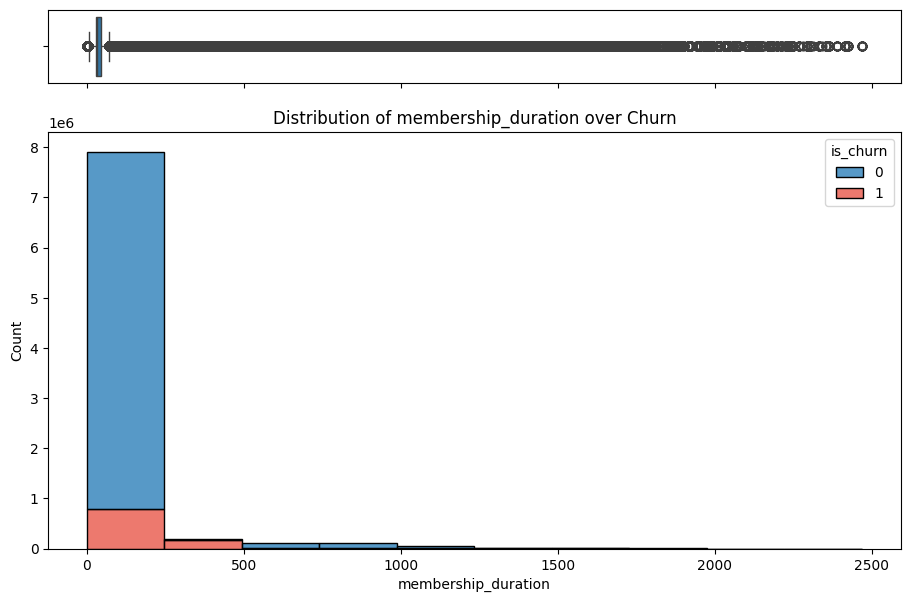

In [32]:
histogram_plot(data_df, 'regis_to_trans')
histogram_plot(data_df, 'membership_duration')

In [30]:
count = data_df[(data_df['membership_duration'] <= 0)].shape[0]
print(f"Number of users with membership duration between -2 and 0: {count}")

Number of users with membership duration between -2 and 0: 51419


## **Categorical Variables**

In [8]:
data_df = categorical_conversion(data_df)
data_df['is_churn'] = data_df['is_churn'].astype('category')
# Verify the conversion
print(data_df.dtypes)

city                   category
bd                        int64
gender                 category
registered_via         category
payment_method_id      category
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew          category
is_cancel              category
is_churn               category
num_25                    int64
num_50                    int64
num_75                    int64
num_985                   int64
num_100                   int64
num_unq                   int64
total_secs              float64
total_activity            int64
completion_rate         float64
is_discounted          category
regis_to_trans            int64
membership_duration       int64
interaction_ratio       float64
transaction_year          int32
transaction_month         int32
registration_year         int32
registration_month        int32
dtype: object


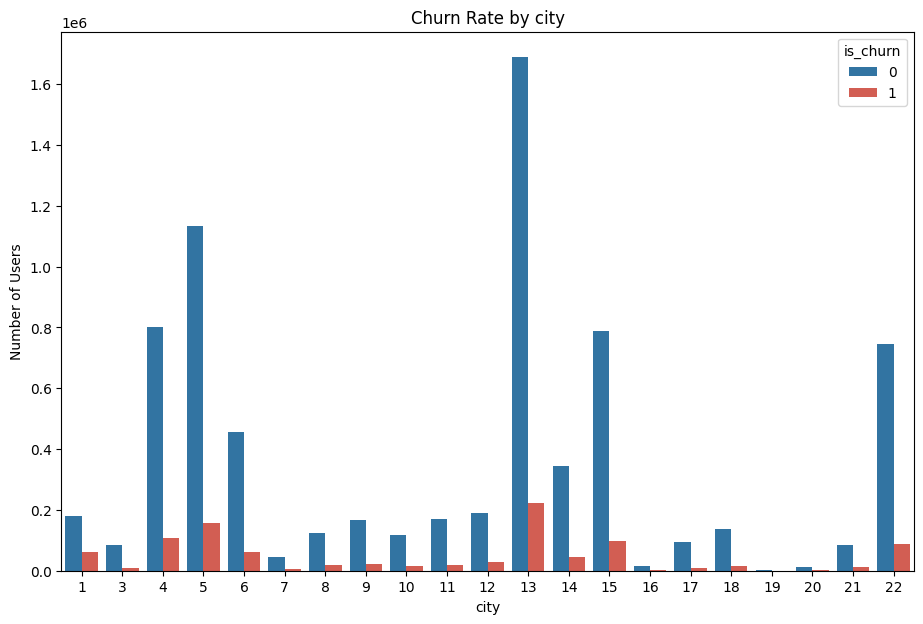

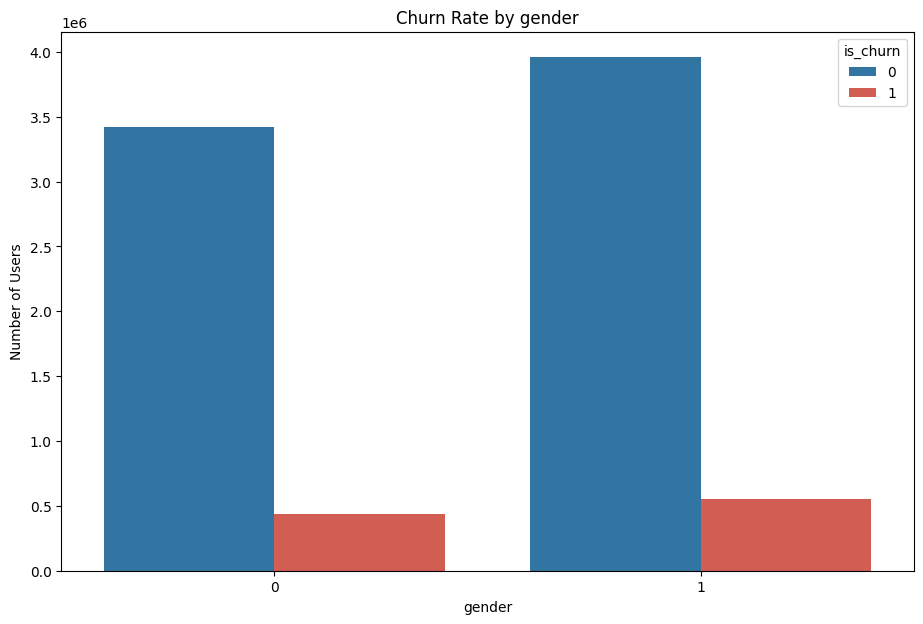

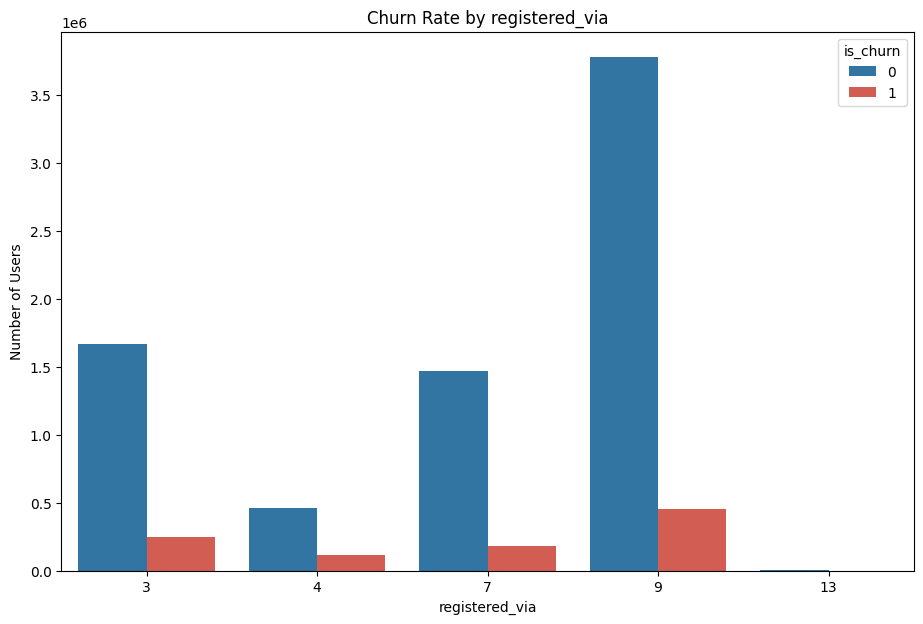

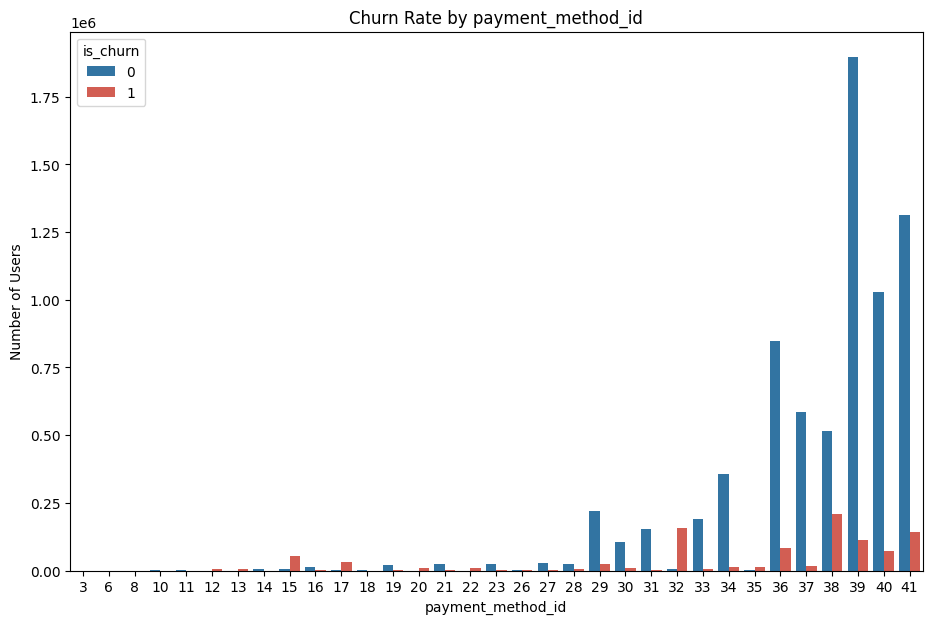

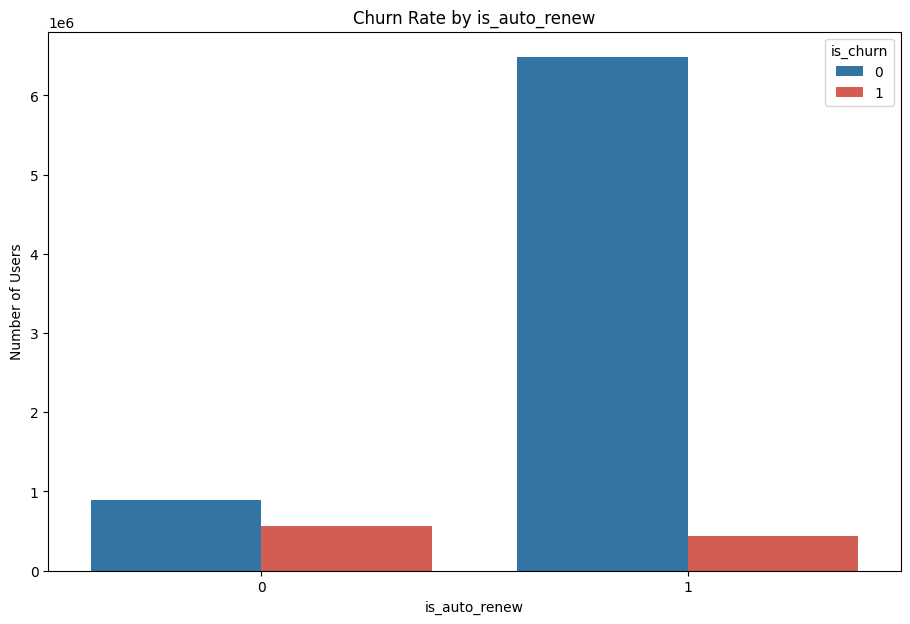

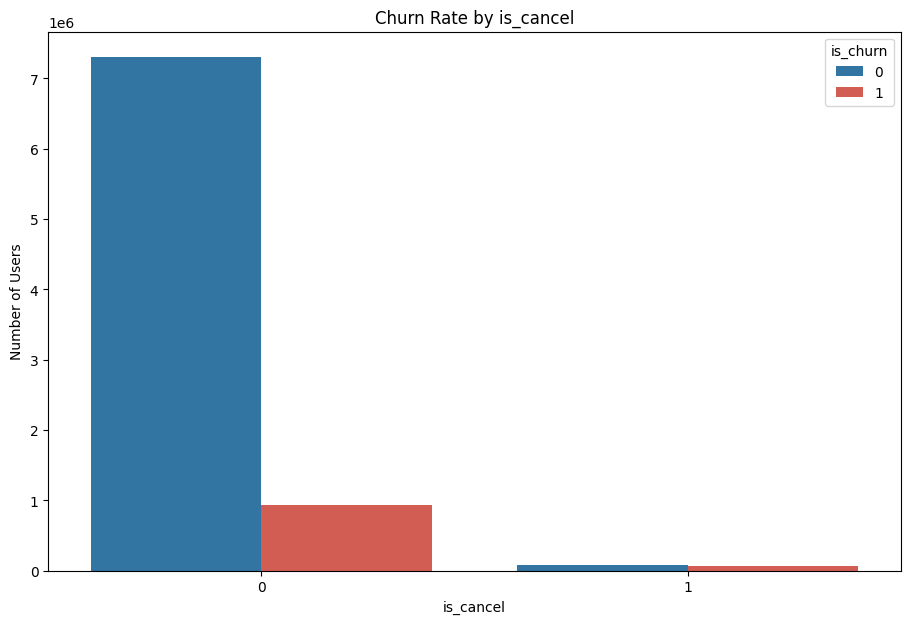

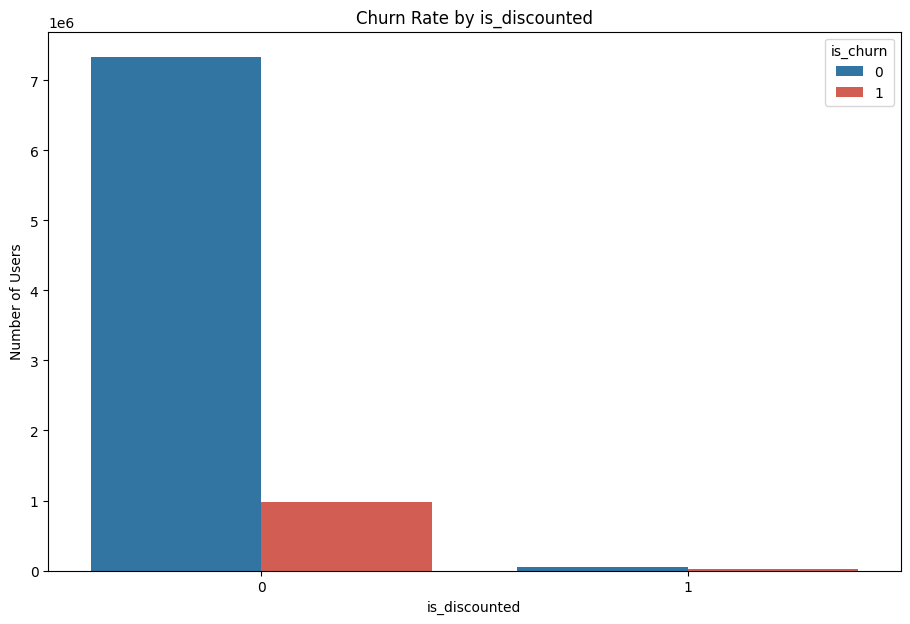

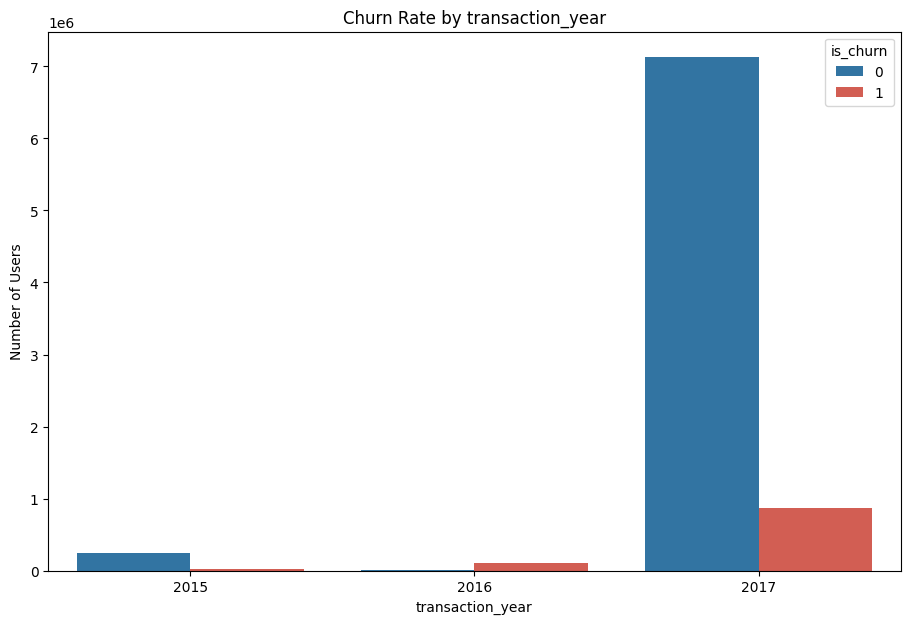

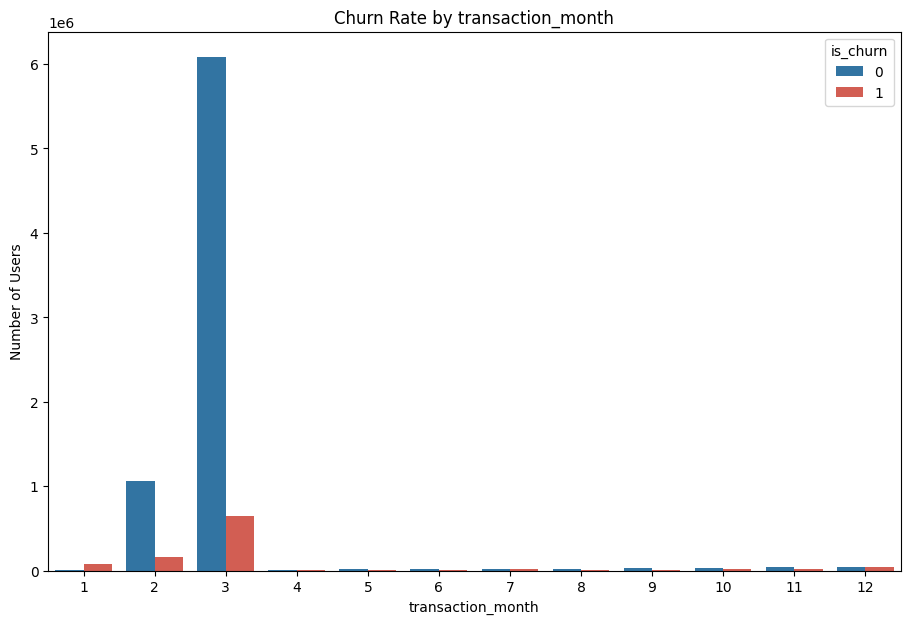

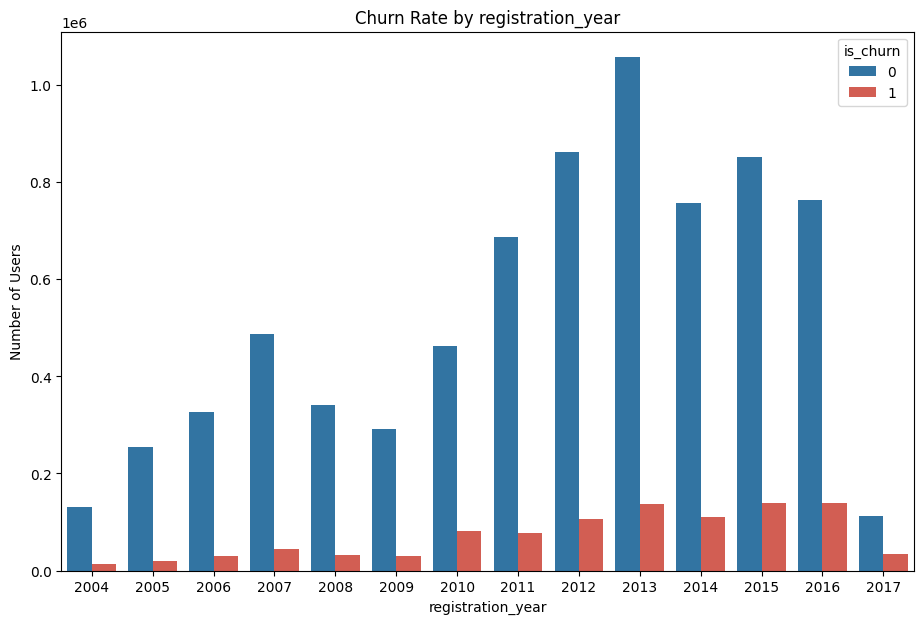

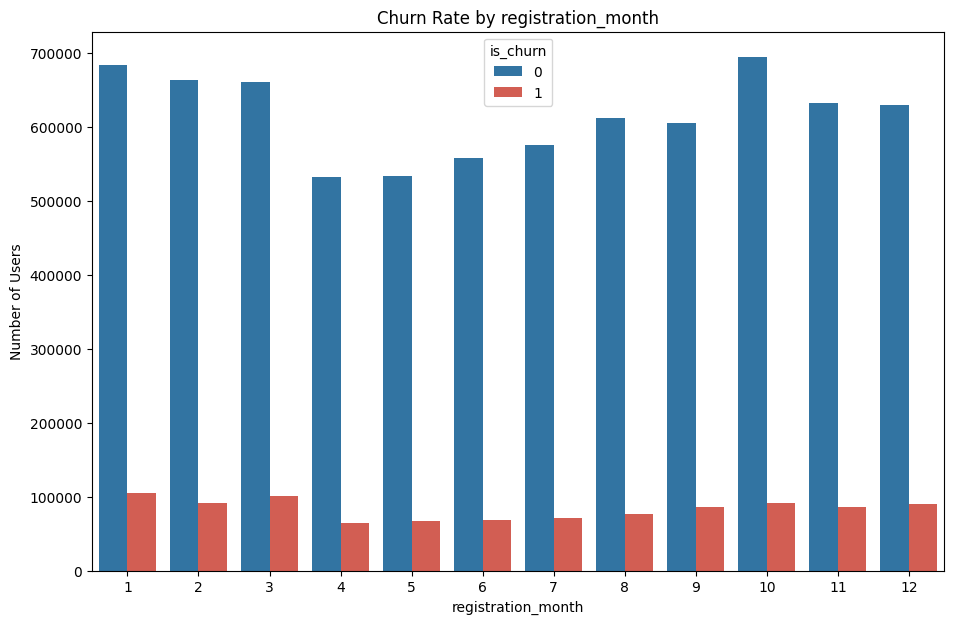

In [9]:
bar_plot(data_df, 'city')
bar_plot(data_df, 'gender')
bar_plot(data_df, 'registered_via')
bar_plot(data_df, 'payment_method_id')
bar_plot(data_df, 'is_auto_renew')
bar_plot(data_df, 'is_cancel')
bar_plot(data_df, 'is_discounted')
bar_plot(data_df, 'transaction_year')
bar_plot(data_df, 'transaction_month')
bar_plot(data_df, 'registration_year')
bar_plot(data_df, 'registration_month')

In [37]:
# Calculate correlation matrix
corr = data_df.corr()

# Plot the correlation heatmap
fig = px.imshow(corr, width=1000, height=1000, title='Correlation Matrix of Numeric Features', color_continuous_scale='Reds')
fig.update_xaxes(tickangle=90)
fig.show()

> ## Target Variable

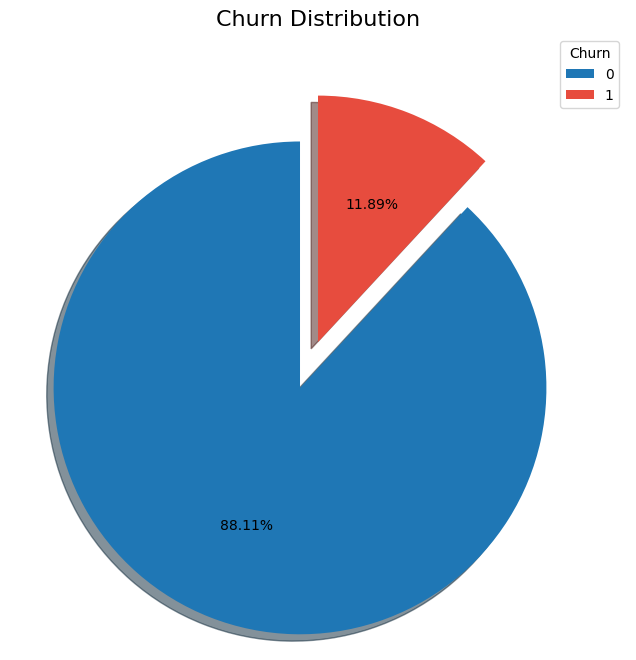

In [38]:
pie_data = data_df['is_churn'].value_counts()
labels = pie_data.index
perct = pie_data.values

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(perct, autopct = '%1.2f%%', explode = [0.2,0], shadow = True, startangle = 90, colors = ["#1F77B5", "#E74C3E"])
plt.title('Churn Distribution', fontsize=16)
plt.legend(labels, title = 'Churn')    
plt.show()

In [32]:
data_df.dtypes

city                   category
bd                        int64
gender                 category
registered_via         category
payment_method_id      category
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew          category
is_cancel              category
is_churn               category
num_25                    int64
num_50                    int64
num_75                    int64
num_985                   int64
num_100                   int64
num_unq                   int64
total_secs              float64
total_activity            int64
completion_rate         float64
is_discounted          category
regis_to_trans            int64
membership_duration       int64
interaction_ratio       float64
transaction_year          int32
transaction_month         int32
dtype: object

In [10]:
transformation(data_df)

,city,bd,gender,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,...,total_activity,completion_rate,is_discounted,regis_to_trans,membership_duration,interaction_ratio,transaction_year,transaction_month,registration_year,registration_month
30,4,0.55,1,9,39,0.066667,0.0745,0.0745,1,0,...,0.012527,0.961538,0,0.425626,0.019044,0.114719,2017,3,2011,9
31,4,0.55,1,9,39,0.066667,0.0745,0.0745,1,0,...,0.011798,0.948980,0,0.425626,0.019044,0.091154,2017,3,2011,9
32,4,0.55,1,9,39,0.066667,0.0745,0.0745,1,0,...,0.002311,0.400000,0,0.425626,0.019044,0.799850,2017,3,2011,9
33,4,0.55,1,9,39,0.066667,0.0745,0.0745,1,0,...,0.010338,0.883721,0,0.425626,0.019044,0.138888,2017,3,2011,9
34,4,0.55,1,9,39,0.066667,0.0745,0.0745,1,0,...,0.014230,0.983051,0,0.425626,0.019044,0.033172,2017,3,2011,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305877,6,0.45,0,7,41,0.066667,0.0745,0.0745,1,0,...,0.002068,0.777778,0,0.106249,0.012561,1.000000,2017,3,2015,10
16305878,6,0.45,0,7,41,0.066667,0.0745,0.0745,1,0,...,0.006203,0.250000,0,0.106249,0.012561,0.788302,2017,3,2015,10
16305879,6,0.45,0,7,41,0.066667,0.0745,0.0745,1,0,...,0.002068,0.555556,0,0.106249,0.012561,0.722013,2017,3,2015,10
16305880,6,0.45,0,7,41,0.066667,0.0745,0.0745,1,0,...,0.002432,0.714286,0,0.106249,0.012561,0.618761,2017,3,2015,10


In [11]:
X_train, X_test, y_train, y_test, X_scaled = stratkfold(data_df)

Logistic Regression:
Accuracy: 0.9214316886974993
Precision: 0.9368653592744749
Recall: 0.36398907816938875
F1 Score: 0.5242842683632157
Jaccard Score: 0.35527456753592235


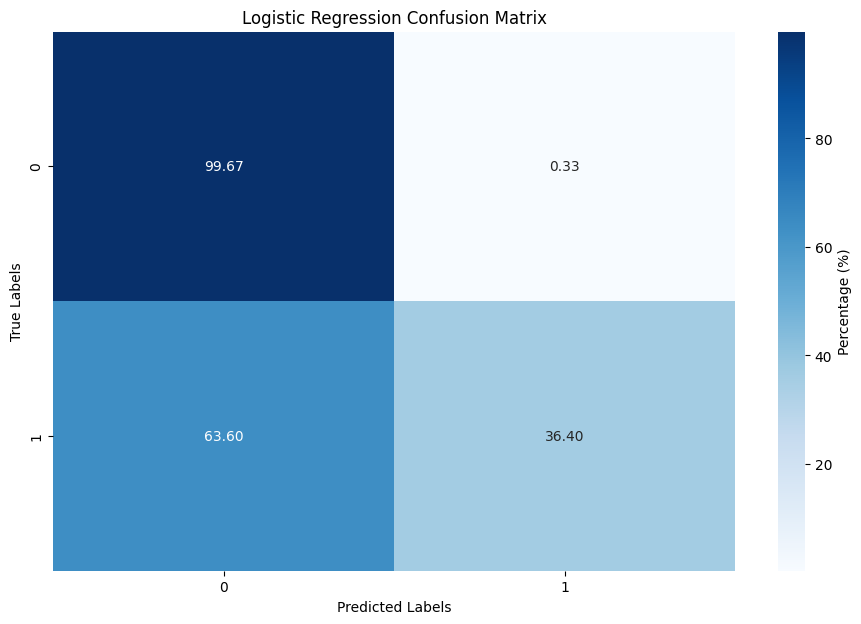

In [11]:
log_ypred = model(LogisticRegression, 'Logistic Regression', X_train, X_test, y_train, y_test, {'solver': 'newton-cg', 'random_state': 69})

Naive Bayes Classification:
Accuracy: 0.9067445332868458
Precision: 0.6178524673674294
Recall: 0.566153367397131
F1 Score: 0.5908742080215402
Jaccard Score: 0.4193197026022305


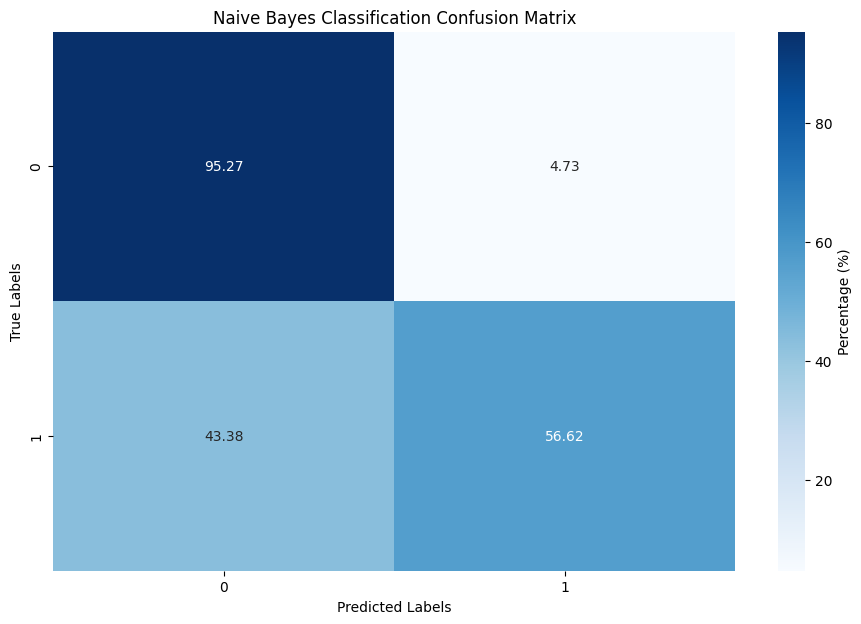

In [55]:
#Naive-Bayes Model
nbModel_ypred = model(GaussianNB, "Naive Bayes Classification", X_train, X_test, y_train, y_test)


Decision Tree Classification:
Accuracy: 0.9974686582276667
Precision: 0.9889518555667001
Recall: 0.989775841472841
F1 Score: 0.9893636769568075
Jaccard Score: 0.978951235373839


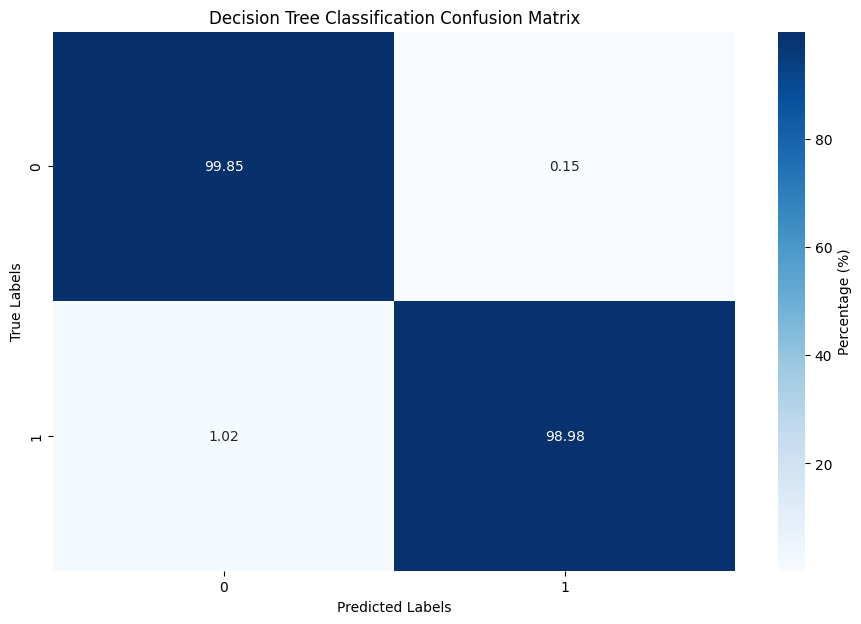

In [56]:
#Decision Tree Classifier Model
dtModel = model(DecisionTreeClassifier, "Decision Tree Classification", X_train, X_test, y_train, y_test, {"random_state": 69})

Random Forest Classification:
Accuracy: 0.9626591267706706
Precision: 0.9633177411700902
Recall: 0.713226658100525
F1 Score: 0.8196190849733521
Jaccard Score: 0.6943682963180141


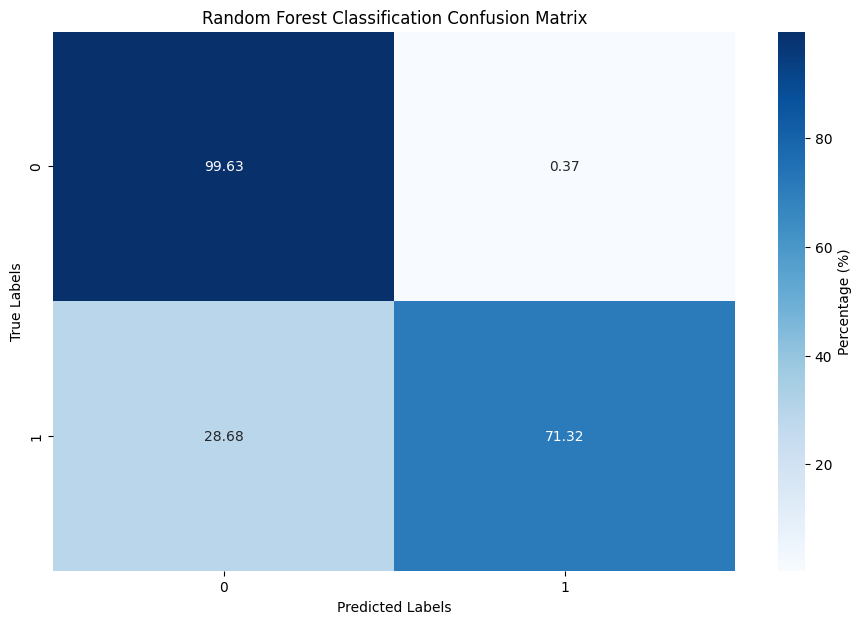

In [59]:
#Random Forest Classifier Model
rfModel_ypred = model(RandomForestClassifier, "Random Forest Classification", X_train, X_test, y_train, y_test, {"n_estimators": 50, "random_state": 69,"max_depth": 8})

LightGBM Classifier:
Accuracy: 0.9702262864320678
Precision: 0.9387583646180329
Recall: 0.8020066856058705
F1 Score: 0.8650110300586015
Jaccard Score: 0.7621316620400843


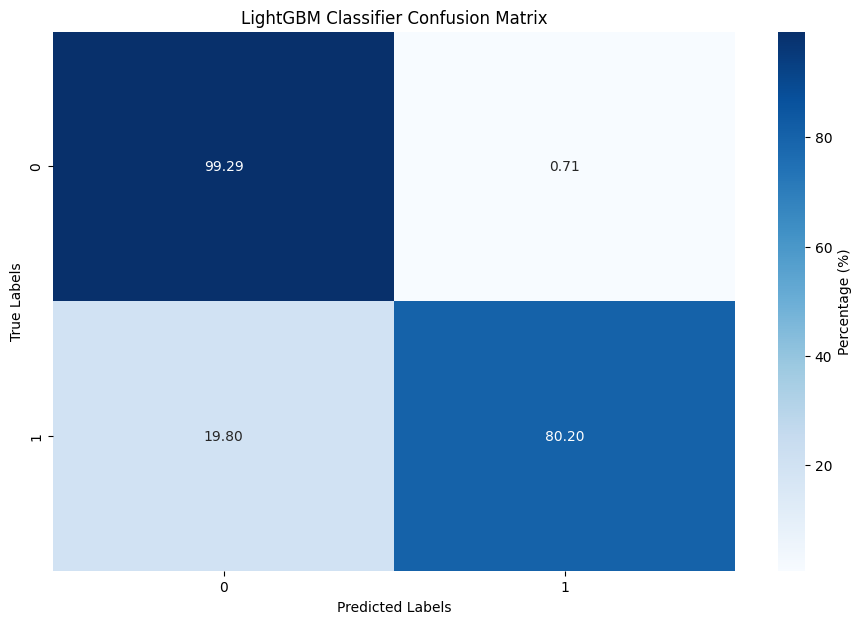

In [12]:
lgbm_ypred = model(LGBMClassifier, "LightGBM Classifier", X_train, X_test, y_train, y_test, {"verbose": 0, "num_threads": 1, "random_state": 69})

In [34]:
'''
# Initialize the LGBM Classifier
lgbm = LGBMClassifier(random_state=69)  # Use GPU for faster training

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [50, 60],       # Maximum number of leaves
    'learning_rate': [0.03, 0.05]      # Learning rate
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=2,                 # Use 3-fold cross-validation for speed
    scoring='accuracy',   # Optimize for accuracy
    verbose=0             # Show progress
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Display results
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_lgbm_model = grid_search.best_estimator_
'''

Best Parameters:  {'learning_rate': 0.05, 'num_leaves': 60}
Best Accuracy:  0.9677144968868675


In [13]:
#Sava the model to disk
filename = 'model/model.sav'
joblib.dump(lgbm_ypred, filename)

['data/model.sav']